# Dimensionality reduction

## Feature importance

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

In [2]:
magic = fetch_openml(name='MagicTelescope', version=1)

In [3]:
df = pd.DataFrame(magic['data'], columns = magic['feature_names']).fillna(0)

y = OrdinalEncoder().fit_transform(magic['target'].reshape(-1, 1)).ravel()

In [4]:
idx_train, idx_test, y_train, y_test = train_test_split(df.index, y, test_size=0.1, stratify = y)

In [5]:
X_train, X_test = df.loc[idx_train], df.loc[idx_test]

In [6]:
model = RandomForestClassifier()

In [7]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
reference = model.score(X_test, y_test)

In [9]:
importances = model.feature_importances_

idx = importances.argsort()[::-1]

importances = importances[idx]
feats = df.columns.values[idx]

<BarContainer object of 10 artists>

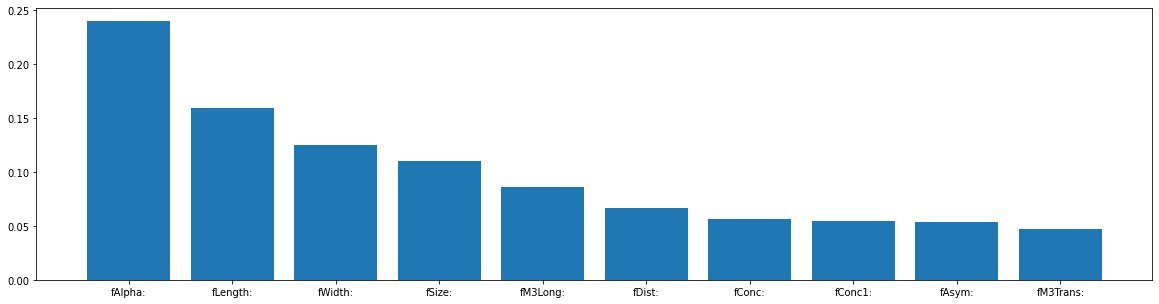

In [10]:
fig, ax = plt.subplots(figsize=(20, 5))

plt.bar(feats, height = importances)

In [11]:
cumimp = np.cumsum(importances)

<BarContainer object of 10 artists>

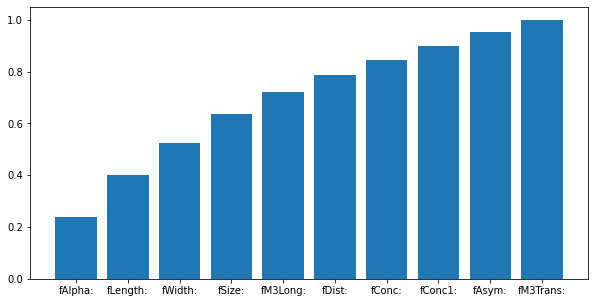

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.bar(feats, height = cumimp)

In [13]:
feats[-4:]

array(['fConc:', 'fConc1:', 'fAsym:', 'fM3Trans:'], dtype=object)

In [14]:
ndf = df.drop(columns=feats[-4:])

In [15]:
X_train_, X_test_ = ndf.loc[idx_train], ndf.loc[idx_test]

In [16]:
model.fit(X_train_, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
score = model.score(X_test_, y_test)

In [18]:
score, reference

(0.870136698212408, 0.8785488958990536)

In [19]:
np.abs(score - reference) / reference

0.0095751047277079

## Feature Selection Module

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection

### Variance Threshold

In [20]:
from sklearn.feature_selection import VarianceThreshold

In [21]:
df.values.var(axis=0)

array([1.79468657e+03, 3.36560086e+02, 2.23337740e-01, 3.34188897e-02,
       1.22119946e-02, 3.50517348e+03, 2.60087529e+03, 4.33759406e+02,
       6.81363178e+02, 5.58454635e+03])

In [22]:
Var = VarianceThreshold(.2)

Var.fit(df)

VarianceThreshold(threshold=0.2)

In [23]:
Var.variances_

array([1.79468657e+03, 3.36560086e+02, 2.23337740e-01, 3.34188897e-02,
       1.22119946e-02, 3.50517348e+03, 2.60087529e+03, 4.33759406e+02,
       6.81363178e+02, 5.58454635e+03])

In [24]:
X = Var.transform(df)

In [25]:
X.var(axis=0)

array([1.79468657e+03, 3.36560086e+02, 2.23337740e-01, 3.50517348e+03,
       2.60087529e+03, 4.33759406e+02, 6.81363178e+02, 5.58454635e+03])

###  Recursive Feature Elimination

In [26]:
from sklearn.feature_selection import RFE, RFECV

In [27]:
model = RFE(estimator=RandomForestClassifier(), n_features_to_select=4, step=2, verbose=2)

In [28]:
model.fit(X_train, y_train)

Fitting estimator with 10 features.
Fitting estimator with 8 features.
Fitting estimator with 6 features.


RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=4, step=2, verbose=2)

## Decomposition

### Principal Component Analysis

In [29]:
import seaborn as sns

In [68]:
from sklearn.datasets import load_iris

In [72]:
data = load_iris()

In [74]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [88]:
iris = pd.DataFrame(data.data, columns = data.feature_names)
iris.loc[:, 'type'] = data.target
iris.type = iris.type.replace([0,1,2], data.target_names)

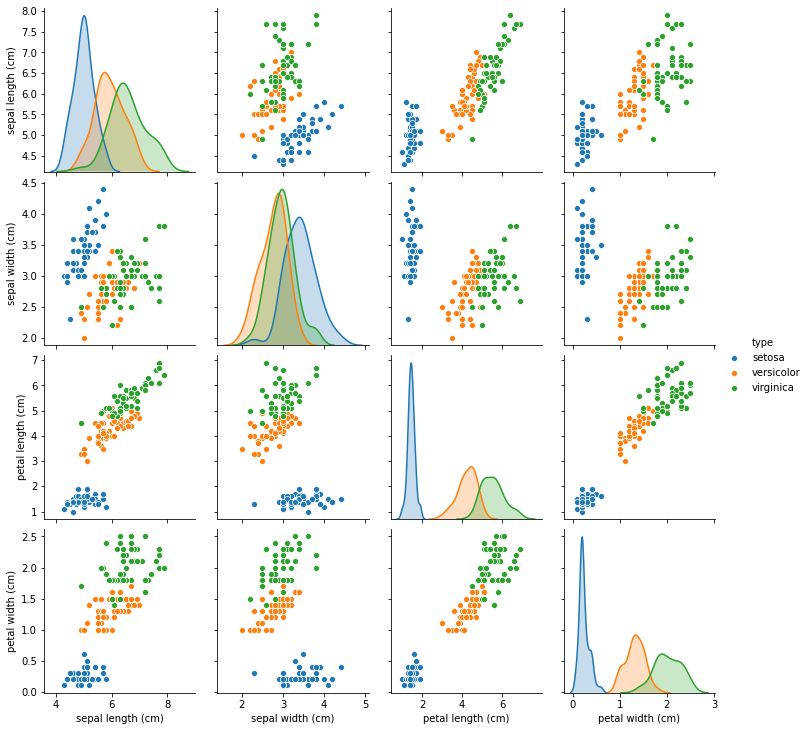

In [89]:
sns.pairplot(iris, hue='type')

In [98]:
from sklearn.decomposition import PCA

In [102]:
pca = PCA()

X = pca.fit_transform(iris.iloc[:, :-1])

In [103]:
df = pd.DataFrame(X, columns=iris.columns[:-1])
df.loc[:, 'type'] = iris.loc[:, 'type']

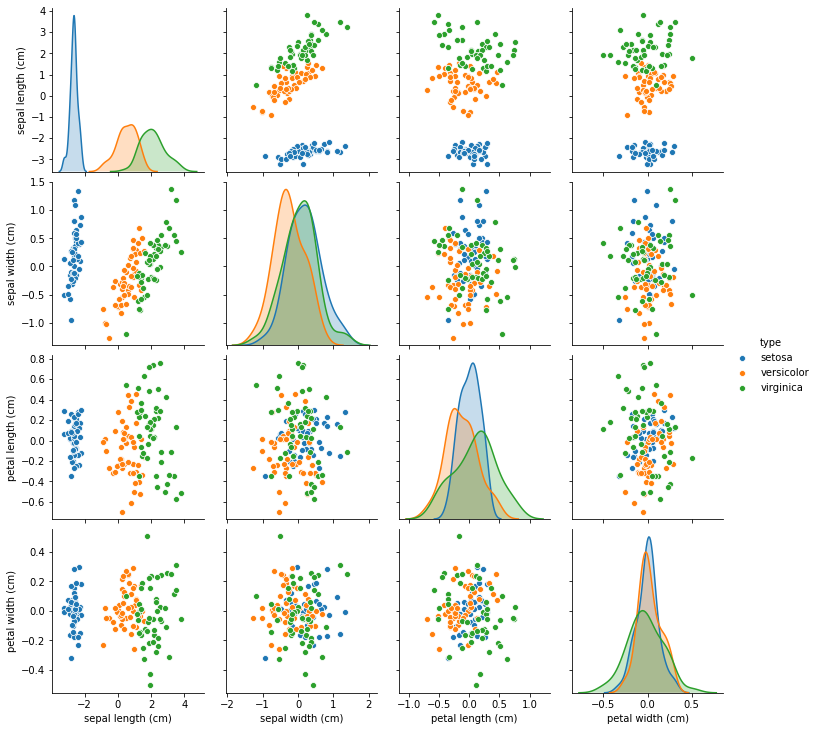

In [104]:
sns.pairplot(df, hue='type')

In [105]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [106]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])